## Project: Identify patterns in Developers' job satisfaction

### Busines Understanding

In this project you will identify different variables that are related to the job satisfaction reported within the developers survey of Stack Overflow. Some of these variables are related to the working habits of the developers (such as the preferred time to start working), the influence of the friends' profile of the developers and the relevance of having difficulty communicating ideas. I will also explore the relation of these variables with the the salary of the developers.

This project is handling a dataset containing quite sensitive information (e.g. compensation level, communication skills, working habits of each individual) and as such it is important to keep in mind that all these responses are "declared" and not "measured", which intrinsically may drive to conclusions containing a bias on how each developer wants to be perceived / judged for those using the information.

Having said this, it is a subject of interest to explore the relation of job satisfaction with a capability as basic as "communication skills", which in any field, not only IT, is a basic characteristic of those who are able to progress. It is also interesting to analize the job satisfaction whose close social nucleus is influenced by other developers, engineers or scientists, as a way to understand if the job satisfaction is reinforced by the social interaction outside work.

The analysis is complemented with other variables that measure how the job satisfaction is influenced by the technical decisions that are made ("My opininons seem to count"). This analysis will be based in the relation between job satisfaction and the fields: InfluenceHardware, InfluenceServers, InfluenceTechStack, InfluenceDeptTech, InfluenceVizTools, InfluenceDatabase, InfluenceCloud, InfluenceConsultants and InfluenceRecruitment.

To note, the conclusions are demonstrated through analytics and charts which will support the conclusions. Datasets are included in the Jupiter repository and a description of the project is included in the "readme" file.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import r2_score, mean_squared_error
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

### Data Understanding

Explore the content of the data set to get an idea of how to handle the data, including its features and the proportion of null values included in those columns that are in ou interest


In [2]:
df = pd.read_csv('./2017 survey_results_public.csv')
schema = pd.read_csv('./2017 survey_results_schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
num_rows = df.shape[0] #Provide the number of rows in the dataset
num_cols = df.shape[1] #Provide the number of columns in the dataset

print(num_rows, " rows within the original dataset")
print (num_cols, " columns within the original dataset")
print(df.shape)
print(df.info())

51392  rows within the original dataset
154  columns within the original dataset
(51392, 154)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 60.4+ MB
None


In [4]:
schema.describe()

,Column,Question
count,154,154
unique,154,149
top,StackOverflowNewQuestion,Which of the following languages have you done...
freq,1,2


In [5]:
schema.shape

(154, 2)

In [6]:
# check feat_info data
print(schema.head(5))

         Column                                           Question
0    Respondent                               Respondent ID number
1  Professional         Which of the following best describes you?
2  ProgramHobby  Do you program as a hobby or contribute to ope...
3       Country            In which country do you currently live?
4    University  Are you currently enrolled in a formal, degree...


In [7]:
# check null number for each col
print(df.isnull().sum())


Respondent                         0
Professional                       0
ProgramHobby                       0
Country                            0
University                         0
EmploymentStatus                   0
FormalEducation                    0
MajorUndergrad                  8551
HomeRemote                      7384
CompanySize                    12470
CompanyType                    12569
YearsProgram                     247
YearsCodedJob                  10502
YearsCodedJobPast              50418
DeveloperType                  15267
WebDeveloperType               40696
MobileDeveloperType            49839
NonDeveloperType               46502
CareerSatisfaction              8697
JobSatisfaction                11016
ExCoderReturn                  50469
ExCoderNotForMe                50471
ExCoderBalance                 50469
ExCoder10Years                 50475
ExCoderBelonged                50464
ExCoderSkills                  50457
ExCoderWillNotCode             50470
E

Gaining understanding of how "empty" are the fields containg data is relevant to have a better perspective of the effectiveness of the models built on these variables. The following cells show those columns with the most empty data and also those columns without missing data

In [8]:
#columns with no missing values
no_nulls = set(df.columns[df.isnull().mean()==0])#Provide a set of columns with 0 missing values.

most_missing_cols = set(df.columns[df.isnull().mean() > 0.75])#Provide a set of columns with more than 75% of the values missing

print (" columns without missing values")
print(no_nulls, " ")
print (" ")
print (" columns with most missing values")
print(most_missing_cols, )

 columns without missing values
{'FormalEducation', 'ProgramHobby', 'University', 'EmploymentStatus', 'Professional', 'Country', 'Respondent'}  
 
 columns with most missing values
{'ExCoderNotForMe', 'WebDeveloperType', 'ExpectedSalary', 'MobileDeveloperType', 'ExCoderSkills', 'NonDeveloperType', 'ExCoderReturn', 'YearsCodedJobPast', 'ExCoderBalance', 'ExCoderWillNotCode', 'ExCoderBelonged', 'TimeAfterBootcamp', 'ExCoderActive', 'ExCoder10Years'}


In [9]:
#As an initial exploration, it is relevant to explore the null values in those columns 
#that I will be analizing, 

df['JobSatisfaction'].isnull().mean()

0.21435242839352428

In [10]:
df['FriendsDevelopers'].isnull().mean()

0.3956841531755915

In [11]:
df['WorkStart'].isnull().mean()

0.285958904109589

In [12]:
df['DifficultCommunication'].isnull().mean()

0.4232565379825654

the results show that 21% of the data related to "job satisfaction" is empty and 28% of the "work start" datais empty
In the other hand, 42% of the "difficult communication" data is empty, which is a fact that will impact the accuracy of the
model

In [13]:
df.groupby(['InfluenceDatabase']).mean()['JobSatisfaction'].sort_values()

InfluenceDatabase
No influence at all              6.695669
Not much influence               6.972815
Some influence                   7.096511
A lot of influence               7.150967
I am the final decision maker    7.478336
Name: JobSatisfaction, dtype: float64

In [14]:
df.groupby(['DifficultCommunication']).mean()['JobSatisfaction'].sort_values()

DifficultCommunication
Strongly agree       6.231132
Agree                6.411046
Somewhat agree       6.698524
Disagree             7.060647
Strongly disagree    7.379706
Name: JobSatisfaction, dtype: float64

In [15]:
df.groupby(['FriendsDevelopers']).mean()['JobSatisfaction'].sort_values()

FriendsDevelopers
Strongly agree       6.922876
Strongly disagree    6.935977
Agree                6.937956
Somewhat agree       6.957011
Disagree             7.034128
Name: JobSatisfaction, dtype: float64

From the previous tables, I can conclude that the job satisfaction increases with the capability to influence which database is selected, and in the same way, the job satisfaction has an inverse relation with the difficult communicating with others.

The following charts allow us to realize more easily the dispersion of the data across the variables that I am exploring. These charts are built using a pandas series of the counts for each type of result in the different variables:

In [16]:
#as a starting point to explore the different options for the questions in our interest, 

status_vals_1 = df.JobSatisfaction.value_counts()
status_vals_2 = df.FriendsDevelopers.value_counts()
status_vals_3 = df.WorkStart.value_counts()
status_vals_4 = df.DifficultCommunication.value_counts()
status_vals_5 = df.HoursPerWeek.value_counts()


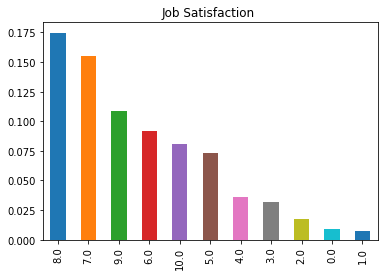

In [17]:
 #bar chart with data from "job satisfaction"
(status_vals_1/df.shape[0]).plot(kind="bar");

plt.title("Job Satisfaction ");

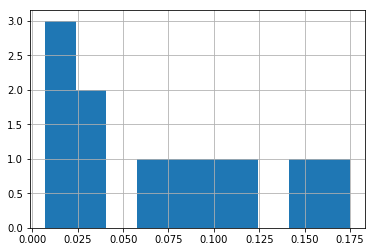

In [18]:
(status_vals_1/df.shape[0]).hist()

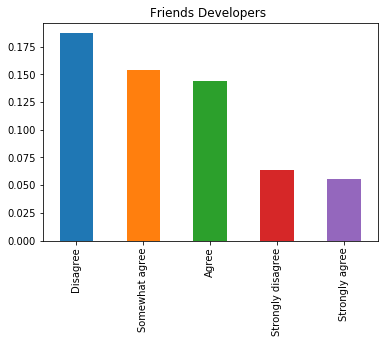

In [19]:
 #bar chart with data from "Friends Developers"
(status_vals_2/df.shape[0]).plot(kind="bar");
plt.title("Friends Developers ");

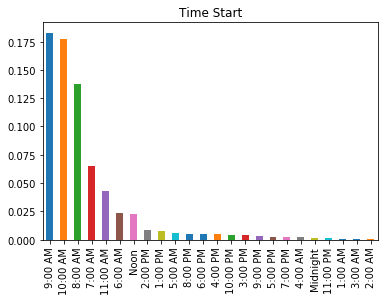

In [20]:
 #bar chart with data from "Time Start"
(status_vals_3/df.shape[0]).plot(kind="bar");
plt.title("Time Start");

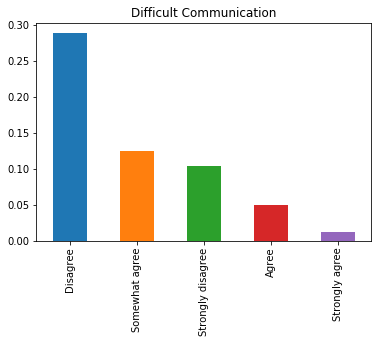

In [21]:
 #bar chart with data from "DifficultCommunication"
(status_vals_4/df.shape[0]).plot(kind="bar");
plt.title("Difficult Communication");

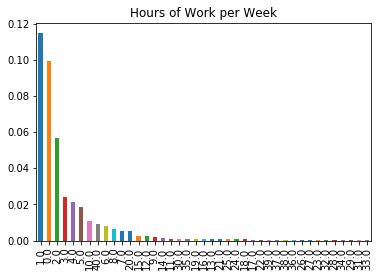

In [22]:
 #bar chart with data from "Hours per Week"
(status_vals_5/df.shape[0]).plot(kind="bar");
plt.title("Hours of Work per Week");


as the above bar chart is difficult to be interpreted due to the wide variation of hours per week, the following histogram is a 


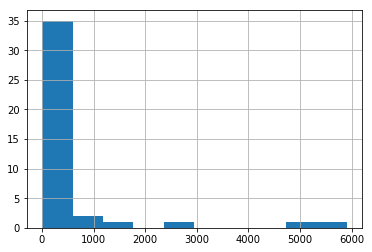

In [23]:
#more friendly way to understand the behavior of this variable.
status_vals_5.hist()

In [24]:
# This dataset clarifies the content of each field contained in the responses
schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


## Data Preparation

In [25]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000



A heat map can also help to clarify the different correlation between variables within the dataset. Interestingly, the variable of "Job Satisfaction" correlates very poorly with most of the variables (including Salary), with the exception of "Career Satisfaction" which correlates at 65%

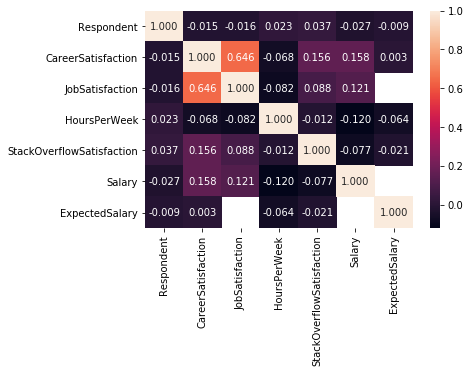

In [26]:
sns.heatmap(df.corr(), annot = True, fmt = '.3f');

## Modeling

### Instantiation

Create a model with those variables that are interesting / will be part of my model to predict the job satisfaction:

In [27]:

X = df[['InfluenceHardware', 'InfluenceServers', 'InfluenceTechStack','InfluenceVizTools','InfluenceDatabase', 'InfluenceCloud','InfluenceConsultants','InfluenceRecruitment', 'DifficultCommunication']]
y = df[['JobSatisfaction']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

lm_model = LinearRegression(normalize = True)

In [28]:
X.head()

,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,DifficultCommunication
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,Disagree
2,Some influence,Some influence,Some influence,Some influence,Some influence,Some influence,Some influence,Some influence,Disagree
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Disagree
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
X_train.shape

(35974, 9)

In [30]:
#quick reference of what is included in this dataset
X_train[:10]

,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,DifficultCommunication
46417,Some influence,I am the final decision maker,No influence at all,No influence at all,A lot of influence,A lot of influence,Some influence,No influence at all,Disagree
41666,Not much influence,Not much influence,Not much influence,Not much influence,Not much influence,A lot of influence,Some influence,Some influence,Disagree
40169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat agree
51371,Not much influence,Some influence,A lot of influence,Not much influence,Some influence,Some influence,No influence at all,No influence at all,NaN
25486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11141,No influence at all,No influence at all,Not much influence,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,Somewhat agree
31374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strongly disagree
7278,Not much influence,Not much influence,Not much influence,Not much influence,Not much influence,Not much influence,Not much influence,Not much influence,NaN
32494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strongly disagree


In [31]:
X_test.shape

(15418, 9)

In [32]:
y_train.shape

(35974, 1)

In [33]:
y_test.shape

(15418, 1)

### Fit Model / Predict / Score the Model

The variables of interest are not numerical, and therefore the linear model can't be executed without managing the values from these columns

For this particular case in which most of my column are categorical variables I will replace the string with nuerical values, in such a way that the model can be run.

Code for this section was taken from:
https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/#targetText=ML%20%7C%20Label%20Encoding%20of%20datasets,or%20more%20than%20one%20columns.&targetText=Label%20Encoding%20refers%20to%20converting,into%20the%20machine%2Dreadable%20form.

In [34]:
#drop any rows with missing values
num_vars = df[['JobSatisfaction','FriendsDevelopers', 'HoursPerWeek', 'WorkStart', 'DifficultCommunication']]
df_dropna = num_vars.dropna(axis=0)

#Drop the rows with missing salaries in field "DifficultCommunication"
drop_comm_df = num_vars.dropna(subset=['DifficultCommunication'], axis=0)

In [35]:
#dataframe with the variables of interest that does not have NA included:
df_dropna.head()

,JobSatisfaction,FriendsDevelopers,HoursPerWeek,WorkStart,DifficultCommunication
3,3.0,Agree,5.0,9:00 AM,Disagree
8,6.0,Somewhat agree,2.0,9:00 AM,Disagree
15,8.0,Disagree,0.0,10:00 AM,Disagree
21,8.0,Agree,1.0,10:00 AM,Strongly disagree
33,5.0,Disagree,2.0,10:00 AM,Disagree


In [36]:
#start label processing to label encode and transform to numerical variables

from sklearn import preprocessing
le_1 = preprocessing.LabelEncoder()

In [37]:
# Encode labels in column 'DifficultCommunicatiom'. 
df_dropna['DifficultCommunication']= le_1.fit_transform(df_dropna['DifficultCommunication']) 

C:\Users\alonslui\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:
le_2 = preprocessing.LabelEncoder()
df_dropna['WorkStart'].unique()


array(['9:00 AM', '10:00 AM', '8:00 AM', '11:00 AM', '7:00 AM', '2:00 PM',
       '10:00 PM', '6:00 AM', 'Noon', '1:00 PM', '3:00 PM', '7:00 PM',
       '4:00 AM', '4:00 PM', '6:00 PM', '5:00 AM', '5:00 PM', '8:00 PM',
       'Midnight', '1:00 AM', '11:00 PM', '9:00 PM', '2:00 AM', '3:00 AM'],
      dtype=object)

In [39]:
# Encode labels
df_dropna['WorkStart']= le_2.fit_transform(df_dropna['WorkStart'])

C:\Users\alonslui\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [40]:
le_3 = preprocessing.LabelEncoder()
df_dropna['FriendsDevelopers'].unique()
df_dropna['FriendsDevelopers']= le_3.fit_transform(df_dropna['FriendsDevelopers'])

C:\Users\alonslui\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
#sanity check that the dataframe has been transformed to numerical values only:
df_dropna.head()

,JobSatisfaction,FriendsDevelopers,HoursPerWeek,WorkStart,DifficultCommunication
3,3.0,0,5.0,20,1
8,6.0,2,2.0,20,1
15,8.0,1,0.0,0,1
21,8.0,0,1.0,0,4
33,5.0,1,2.0,0,1


Generate the model using the dataframe that has been transformed


In [42]:
Xle = df_dropna[['FriendsDevelopers', 'HoursPerWeek', 'WorkStart', 'DifficultCommunication']]
yle = df_dropna[['JobSatisfaction']]

Xle_train, Xle_test, yle_train, yle_test = train_test_split(Xle, yle, test_size = 0.3, random_state = 42)

lm_model = LinearRegression(normalize = True)  # Instantiate

In [43]:
lm_model.fit(Xle_train, yle_train) #Fit

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [44]:
#Predict using your model
yle_test_preds = lm_model.predict(Xle_test)
yle_train_preds = lm_model.predict(Xle_train)

In [45]:
#Score using your model
test_score = r2_score(yle_test, yle_test_preds)
train_score = r2_score(yle_train, yle_train_preds)

In [46]:
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(yle_test, yle_test_preds), len(yle_test))

'The r-squared score for the model using only quantitative variables was 0.0120314155518364 on 1956 values.'


The coefficient 0.01 is extremelly small, which means that there is no correlation between these variables and the job satisfaction.

In the following section I will explore the relation between the job satisfaction and the capability to influence the technical decisions of the company, in other words("My opininons seem to count"). The variables to explore are: InfluenceHardware, InfluenceServers, InfluenceTechStack, InfluenceDeptTech, InfluenceVizTools, InfluenceDatabase, InfluenceCloud, InfluenceConsultants and InfluenceRecruitment.

In [47]:
#drop any rows with missing values
num_vars = df[['JobSatisfaction','InfluenceHardware', 'InfluenceServers', 'InfluenceTechStack','InfluenceVizTools','InfluenceDatabase', 'InfluenceCloud','InfluenceConsultants','InfluenceRecruitment', 'DifficultCommunication']]
df_dropna = num_vars.dropna(axis=0)

#Drop the rows with missing salaries in field "DifficultCommunication"
drop_comm_df = num_vars.dropna(subset=['DifficultCommunication'], axis=0)

In [48]:
# test how does it look the data dropping NA's in one columns:
drop_comm_df.head()

,JobSatisfaction,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,DifficultCommunication
1,NaN,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,Disagree
2,9.0,Some influence,Some influence,Some influence,Some influence,Some influence,Some influence,Some influence,Some influence,Disagree
3,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Disagree
7,7.0,No influence at all,Not much influence,Some influence,Not much influence,No influence at all,Not much influence,No influence at all,Not much influence,Somewhat agree
8,6.0,No influence at all,No influence at all,Some influence,A lot of influence,No influence at all,No influence at all,Some influence,No influence at all,Disagree


In [49]:
#dataframe with the variables of interest that does not have NA included:
df_dropna.head()

,JobSatisfaction,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,DifficultCommunication
2,9.0,Some influence,Some influence,Some influence,Some influence,Some influence,Some influence,Some influence,Some influence,Disagree
7,7.0,No influence at all,Not much influence,Some influence,Not much influence,No influence at all,Not much influence,No influence at all,Not much influence,Somewhat agree
8,6.0,No influence at all,No influence at all,Some influence,A lot of influence,No influence at all,No influence at all,Some influence,No influence at all,Disagree
13,6.0,Some influence,I am the final decision maker,I am the final decision maker,A lot of influence,I am the final decision maker,I am the final decision maker,Some influence,A lot of influence,Disagree
14,8.0,Not much influence,Not much influence,No influence at all,No influence at all,No influence at all,No influence at all,Not much influence,No influence at all,Disagree


In [50]:
#identify the unique variables contained in the field "Difficult Communication"
df_dropna['DifficultCommunication'].unique() 

array(['Disagree', 'Somewhat agree', 'Strongly disagree', 'Agree',
       'Strongly agree'], dtype=object)

In [51]:
#start label processing to label encode and transform to numerical variables

from sklearn import preprocessing
le_1 = preprocessing.LabelEncoder()

In [52]:
# Encode labels in column 'DifficultCommunicatiom'. 
df_dropna['DifficultCommunication']= le_1.fit_transform(df_dropna['DifficultCommunication']) 

C:\Users\alonslui\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [53]:
#sanity check to verify that the transformation from labels to numbers took place:
df_dropna['DifficultCommunication'].unique() 

array([1, 2, 4, 0, 3], dtype=int64)

In [54]:
#sanity check to verify that the transformation from labels to numbers took place, 
#using the dataframe with variables of interest

df_dropna.head()

,JobSatisfaction,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,DifficultCommunication
2,9.0,Some influence,Some influence,Some influence,Some influence,Some influence,Some influence,Some influence,Some influence,1
7,7.0,No influence at all,Not much influence,Some influence,Not much influence,No influence at all,Not much influence,No influence at all,Not much influence,2
8,6.0,No influence at all,No influence at all,Some influence,A lot of influence,No influence at all,No influence at all,Some influence,No influence at all,1
13,6.0,Some influence,I am the final decision maker,I am the final decision maker,A lot of influence,I am the final decision maker,I am the final decision maker,Some influence,A lot of influence,1
14,8.0,Not much influence,Not much influence,No influence at all,No influence at all,No influence at all,No influence at all,Not much influence,No influence at all,1


Repeat this process for the other variables with labels: 
InfluenceHardware, 
InfluenceServers, 
InfluenceTechStack, 
InfluenceDeptTech, 
InfluenceVizTools, 
InfluenceDatabase, 
InfluenceCloud, 
InfluenceConsultants, 
InfluenceRecruitment

In [55]:
le_2 = preprocessing.LabelEncoder()
df_dropna['InfluenceHardware'].unique()

array(['Some influence', 'No influence at all', 'Not much influence',
       'A lot of influence', 'I am the final decision maker'],
      dtype=object)

In [56]:
df_dropna['InfluenceHardware']= le_2.fit_transform(df_dropna['InfluenceHardware'])

C:\Users\alonslui\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [57]:
#check that the field has changed to numerical values:
df_dropna['InfluenceHardware'].unique() 

array([4, 2, 3, 0, 1], dtype=int64)

In [58]:
le_3 = preprocessing.LabelEncoder()
df_dropna['InfluenceServers'].unique()

array(['Some influence', 'Not much influence', 'No influence at all',
       'I am the final decision maker', 'A lot of influence'],
      dtype=object)

In [59]:
df_dropna['InfluenceServers']= le_3.fit_transform(df_dropna['InfluenceServers'])

C:\Users\alonslui\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [60]:
df_dropna['InfluenceServers'].unique()

array([4, 3, 2, 1, 0], dtype=int64)

In [61]:
#sanity check that the dataframe continue its transformation to numerical values only:
df_dropna.head()

,JobSatisfaction,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,DifficultCommunication
2,9.0,4,4,Some influence,Some influence,Some influence,Some influence,Some influence,Some influence,1
7,7.0,2,3,Some influence,Not much influence,No influence at all,Not much influence,No influence at all,Not much influence,2
8,6.0,2,2,Some influence,A lot of influence,No influence at all,No influence at all,Some influence,No influence at all,1
13,6.0,4,1,I am the final decision maker,A lot of influence,I am the final decision maker,I am the final decision maker,Some influence,A lot of influence,1
14,8.0,3,3,No influence at all,No influence at all,No influence at all,No influence at all,Not much influence,No influence at all,1


In [62]:
le_4 = preprocessing.LabelEncoder()
df_dropna['InfluenceTechStack'].unique()
#check that the field has changed to numerical values:
df_dropna['InfluenceTechStack']= le_4.fit_transform(df_dropna['InfluenceTechStack'])
df_dropna['InfluenceTechStack'].unique()

C:\Users\alonslui\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([4, 1, 2, 3, 0], dtype=int64)

In [63]:
le_5 = preprocessing.LabelEncoder()
df_dropna['InfluenceDatabase'].unique()
#check that the field has changed to numerical values:
df_dropna['InfluenceDatabase']= le_5.fit_transform(df_dropna['InfluenceDatabase'])
df_dropna['InfluenceDatabase'].unique()

C:\Users\alonslui\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([4, 2, 1, 3, 0], dtype=int64)

In [64]:
le_6 = preprocessing.LabelEncoder()
df_dropna['InfluenceCloud'].unique()
#check that the field has changed to numerical values:
df_dropna['InfluenceCloud']= le_6.fit_transform(df_dropna['InfluenceCloud'])
df_dropna['InfluenceCloud'].unique()

C:\Users\alonslui\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([4, 3, 2, 1, 0], dtype=int64)

In [65]:
le_7 = preprocessing.LabelEncoder()
df_dropna['InfluenceConsultants'].unique()
#check that the field has changed to numerical values:
df_dropna['InfluenceConsultants']= le_7.fit_transform(df_dropna['InfluenceConsultants'])
df_dropna['InfluenceConsultants'].unique()

C:\Users\alonslui\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([4, 2, 3, 1, 0], dtype=int64)

In [66]:
le_8 = preprocessing.LabelEncoder()
df_dropna['InfluenceRecruitment'].unique()
#check that the field has changed to numerical values:
df_dropna['InfluenceRecruitment']= le_8.fit_transform(df_dropna['InfluenceRecruitment'])
df_dropna['InfluenceRecruitment'].unique()

C:\Users\alonslui\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([4, 3, 2, 0, 1], dtype=int64)

In [67]:
le_9 = preprocessing.LabelEncoder()
df_dropna['InfluenceVizTools'].unique()
#check that the field has changed to numerical values:
df_dropna['InfluenceVizTools']= le_9.fit_transform(df_dropna['InfluenceVizTools'])
df_dropna['InfluenceVizTools'].unique()

C:\Users\alonslui\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([4, 3, 0, 2, 1], dtype=int64)

In [68]:
#sanity check that the dataframe continue its transformation to numerical values only:
df_dropna.head()

,JobSatisfaction,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,DifficultCommunication
2,9.0,4,4,4,4,4,4,4,4,1
7,7.0,2,3,4,3,2,3,2,3,2
8,6.0,2,2,4,0,2,2,4,2,1
13,6.0,4,1,1,0,1,1,4,0,1
14,8.0,3,3,2,2,2,2,3,2,1


Re-generate the model using the dataframe that has been transformed

In [69]:
Xle = df_dropna[['InfluenceHardware', 'InfluenceServers', 'InfluenceTechStack','InfluenceVizTools','InfluenceDatabase', 'InfluenceCloud','InfluenceConsultants','InfluenceRecruitment', 'DifficultCommunication']]
yle = df_dropna[['JobSatisfaction']]


Xle_train, Xle_test, yle_train, yle_test = train_test_split(Xle, yle, test_size = 0.3, random_state = 42)

lm_model = LinearRegression(normalize = True)  # Instantiate

the dataframe already dropped any rows with missing values


In [70]:
Xle_train.shape

(9375, 9)

In [71]:
Xle_test.shape   #quick reference of what is included in this dataset

(4019, 9)

In [72]:
#job satisfaction should be a single column with quantitative values:
yle_train[:10]

,JobSatisfaction
47233,9.0
21257,10.0
21345,10.0
575,6.0
14862,9.0
20910,10.0
48685,9.0
42163,10.0
10584,10.0
28386,6.0


Fitting the model to a linear regression:

In [80]:
lm_model.fit(Xle_train, yle_train) #Fit

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [81]:
#Predict using your model
yle_test_preds = lm_model.predict(Xle_test)
yle_train_preds = lm_model.predict(Xle_train)


In [75]:
#Score using your model
test_score = r2_score(yle_test, yle_test_preds)
train_score = r2_score(yle_train, yle_train_preds)

In [76]:
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(yle_test, yle_test_preds), len(yle_test))

'The r-squared score for the model using only quantitative variables was 0.0035604831248607915 on 4019 values.'

In [77]:
test_score

0.0035604831248607915

Conclusion: it is clear that the job satisfaction IS NOT impacted for the degree of influence in regards to the technical decisions that can influence within the organization.

The heatmap shown below demonstrates the small level of correlation between this variables. Interestingly, the least correlated is the "Diffiult Communication", which does not have a strong correlation with any of the other variables.

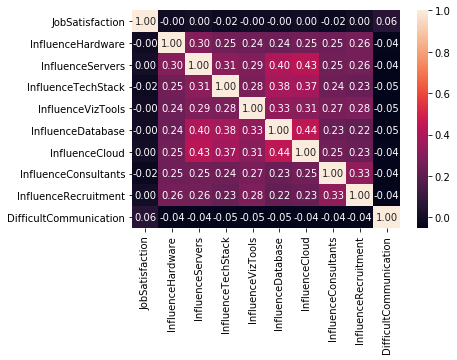

In [82]:
sns.heatmap(df_dropna.corr(), annot = True, fmt = '.2f');

Using the results from the previous heatmap, a model which actually show a relation between variables would be  between the influence in technical decisions with the influence in defining the database system or solution is as follow:

In [84]:
Xle = df_dropna[['InfluenceHardware', 'InfluenceServers', 'InfluenceTechStack','InfluenceVizTools', 'InfluenceCloud','InfluenceConsultants','InfluenceRecruitment', 'DifficultCommunication']]
yle = df_dropna[['InfluenceDatabase']]


Xle_train, Xle_test, yle_train, yle_test = train_test_split(Xle, yle, test_size = 0.3, random_state = 42)

lm_model = LinearRegression(normalize = True)  # Instantiate
lm_model.fit(Xle_train, yle_train) #Fit
#Predict using your model
yle_test_preds = lm_model.predict(Xle_test)
yle_train_preds = lm_model.predict(Xle_train)
#Score using your model
test_score = r2_score(yle_test, yle_test_preds)
train_score = r2_score(yle_train, yle_train_preds)
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(yle_test, yle_test_preds), len(yle_test))


'The r-squared score for the model using only quantitative variables was 0.3189417779768251 on 4019 values.'

This coefficient is higher than the previous, and as such it demonstrates that person who can influence the database will likely influence other technical decisions in the company. Nevertheless, this influencing capability is not correlated with his job satisfaction.